<a href="https://colab.research.google.com/github/hpnightowl/owlsbooks/blob/master/income_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cd = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Training_set_census.csv" )

In [84]:
cd.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,d_household_family_stat,d_household_summary,migration_msa,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,num_person_Worked_employer,family_members_under_18,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,23,Private,43,22,Some college but no degree,0,College or university,Never married,Education,Adm support including clerical,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Peru,Peru,United-States,Native- Born in the United States,0,Not in universe,2,30,95,0
1,24,Private,34,2,Bachelors degree(BA AB BS),0,Not in universe,Never married,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,No,Not in universe,Children or Armed Forces,0,0,0,Single,West,California,Nonfamily householder,Householder,MSA to MSA,Different county same state,Different county same state,No,No,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,94,0
2,38,Private,34,2,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,250,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,1
3,33,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Joint both under 65,Not in universe,Not in universe,Child 18+ ever marr RP of subfamily,Child 18 or older,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
4,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,0


In [85]:
cd.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       592
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           477
d_household_family_stat                 0
d_household_summary               

In [86]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   199408 non-null  object
 12  se

In [87]:
for col in cd:
    print(col,cd[col].unique(),end='\n\n')

age [23 24 38 33 13 16 28 44 31 35 17 42 26 49 46 18 41  5  2  9 63 11 22 68
 43 48 40 73  1 54 70 36 52  6  3 79 47 76 71 50 12 57  7 27 14 29 21 10
 15 37 58 66  8 82 20 69 32 74 30 19 60  0 55 45 67  4 25 90 59 65 34 81
 56 51 39 64 61 86 78 85 62 53 83 75 87 80 72 88 89 77 84]

class_of_worker ['Private' 'Not in universe' ' Not in universe' ' Private'
 'Self-employed-not incorporated' ' Self-employed-not incorporated'
 'Local government' 'Self-employed-incorporated' 'Federal government'
 ' Self-employed-incorporated' 'State government' ' Federal government'
 ' State government' ' Local government' ' Never worked' 'Never worked'
 'Without pay' ' Without pay']

industry_code [43 34  0 29 22 44 12 33  3 40 41 45 13 30 38  2 25 24  1 31 42  9 28  4
 37 32 26 39 36  6 16 50 48 35 49 19 27 23 11 21 47 18  8  7 15  5 14 51
 46 17 20 10]

occupation_code [22  2  0 38 35  4 20 32 29 19 31 30 16 37 23 26 17 44 36 25 10 24 33 39
 34 42 12  3 18  6 43 27 11 13 21 15  1  5  8 41  9  7 28 40 14 

In [88]:
cd.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [89]:
# To remove those _ values in between so that it will not make duplcated with just a space
for col in cd:
  if cd[col].dtypes == object:
    cd[col]=cd[col].str.strip()

In [90]:
cd['hispanic_origin'] = cd['hispanic_origin'].fillna(cd['hispanic_origin'].mode())
cd['state_of_previous_residence'] = cd['state_of_previous_residence'].fillna(cd['state_of_previous_residence'].mode())
cd['country_self'] = cd['country_self'].fillna(cd['country_self'].mode())
cd['country_self'] = cd['country_father'].fillna(cd['country_father'].mode())
cd['country_self'] = cd['country_mother'].fillna(cd['country_mother'].mode())

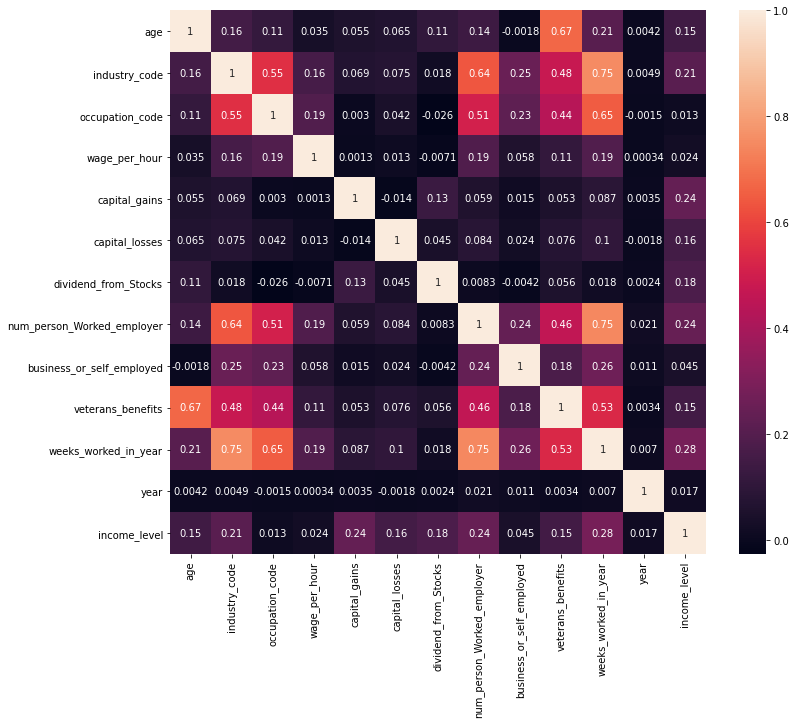

In [91]:
cor = cd.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True)

In [92]:
from sklearn.preprocessing import LabelEncoder

cat_features=[x for x in cd.columns if cd[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in cd.columns:
        i = cd.columns.get_loc(col)
        cd.iloc[:,i] = cd.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [93]:
#seperating variables

X = cd.drop(columns=['migration_msa', 'migration_reg',
       'migration_within_reg', 'migration_sunbelt',
       'income_level'])
y = cd[['income_level']]

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)
model = RandomForestClassifier(criterion='entropy',random_state=47)
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

In [95]:
y_pred = model.predict(X_test)

In [96]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.5687465488680287

In [97]:
ce = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Testing_set_census.csv')

In [98]:
ce.shape

(50000, 40)

In [99]:
ce.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       146
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           117
d_household_family_stat                 0
d_household_summary               

In [100]:
ce = ce.drop(columns=['migration_msa', 'migration_reg',
       'migration_within_reg', 'migration_sunbelt'])

# To remove those _ values in between so that it will not make duplcated with just a space
for col in ce:
  if ce[col].dtypes == object:
    ce[col]=ce[col].str.strip()
  
ce['hispanic_origin'] = ce['hispanic_origin'].fillna(ce['hispanic_origin'].mode())
ce['state_of_previous_residence'] = ce['state_of_previous_residence'].fillna(ce['state_of_previous_residence'].mode())
ce['country_self'] = ce['country_self'].fillna(ce['country_self'].mode())
cd['country_father'] = cd['country_father'].fillna(cd['country_father'].mode())
cd['country_mother'] = cd['country_mother'].fillna(cd['country_mother'].mode())


In [101]:
from sklearn.preprocessing import LabelEncoder

cat_features=[x for x in ce.columns if ce[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in ce.columns:
        i = ce.columns.get_loc(col)
        ce.iloc[:,i] = ce.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [102]:
predictions = model.predict(ce)

In [103]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = ce.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>